# Darren Hunt

PHYS 434AA

10-27-2020

HW 4

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

# Looking at Subsets of Data

In [2]:
# make fake background data
t = np.linspace(0,np.pi*100,np.int(1e5))  # time axis from 0 to 100pi in 1e5 steps
N = 10+np.sin(t)  # offset sinusoid
bkgd = stats.norm.rvs(size=np.int(1e5))*np.sqrt(N)+N  # random bkg, mean and variance depend on N

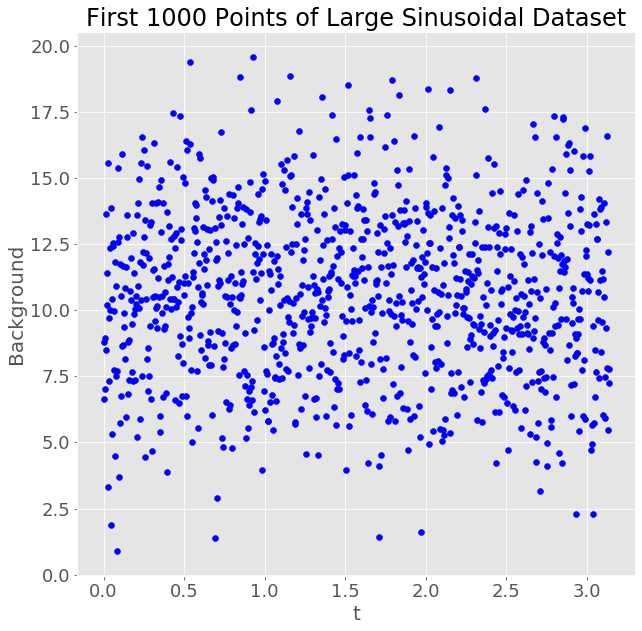

In [3]:
# scatter plot of first 1000 data pts
first1k = t[0:1000]
first1kBkgd = bkgd[0:1000]

plt.style.use('ggplot')
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.set_title("First 1000 Points of Large Sinusoidal Dataset", fontsize=24)
ax.set_xlabel("t", fontsize=20)
ax.set_ylabel("Background", fontsize=20)

plt.scatter(first1k, first1kBkgd,color='b')
plt.tick_params(labelsize = 18)

plt.show()

In order to look at a small portion of a large data set, we can use array slicing. For many data values, this allows us to examine just a portion of it at a time. Above I have scatterplotted 1000 of the 100k data points, showing how array slicing can cut down the amount of data we plot when visualizing.

In [4]:
def scatter_plotter(t,bg,start,stop,step):
    # scatterplots a portion of a dataset, based on input slicing values for the array.
    slicedt = t[start:stop:step]
    slicedbg = bg[start:stop:step]
    
    plt.style.use('ggplot')
    fig, ax = plt.subplots(1, 1, figsize=(10,10))
    if stop != None:
        ax.set_title("Plot of Dataset from Point " + str(start) + " to " + str(stop), fontsize=24)
    else:  # different plot title, since we are plotting the whole dataset
        ax.set_title("Plot of Full Dataset with Step=" + str(step), fontsize=24)
    ax.set_xlabel("t", fontsize=20)
    ax.set_ylabel("Background", fontsize=20)
    plt.tick_params(labelsize = 18)

    plt.scatter(slicedt,slicedbg,color='b')
    plt.show()

This function is a generalization of the previous plot. Input parameters include: t and bg, the t (or x) axis values and the background distribution; start and stop, the beginning and end of the array slice (the section of points we want to plot); and step, if we want to plot only certain datapoints every *N* times. To not skip any points, step=1, or step=None.

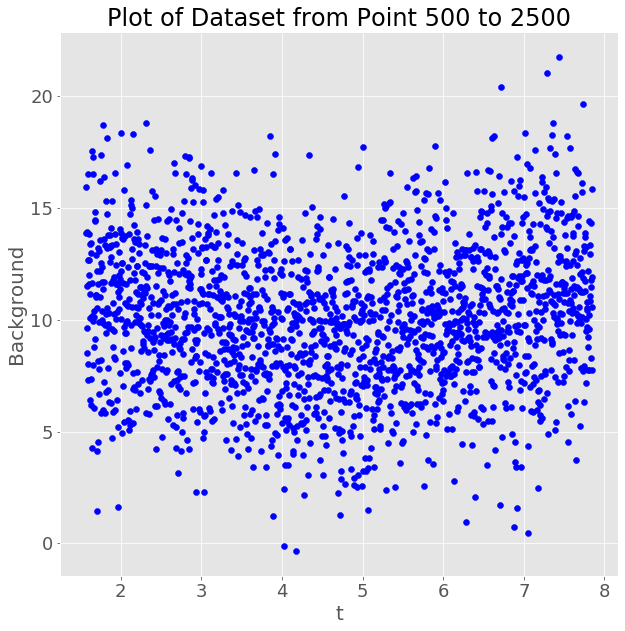

In [5]:
scatter_plotter(t,bkgd,500,2500,1)

Using the scatter_plotter function written above, we can plot a sliced portion of our 100,000 point dataset that we originally generated. This plot sliced from t=500 to t=2500, and did not skip any points in between.

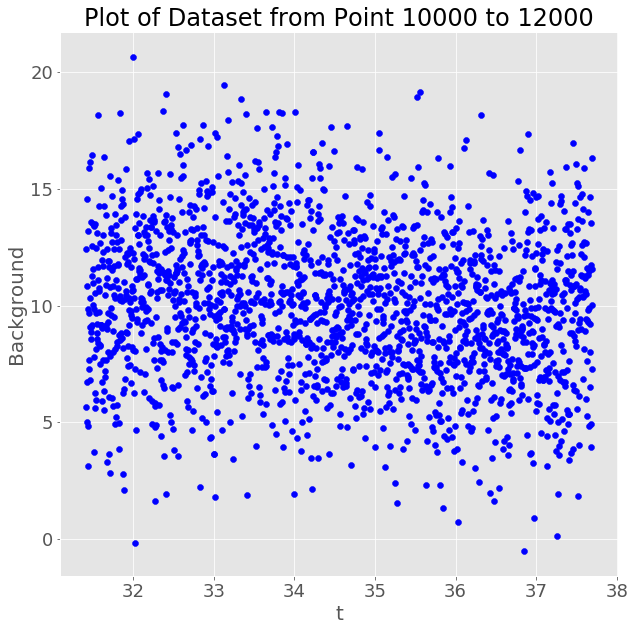

In [6]:
scatter_plotter(t,bkgd,10000,12000,None)

Here is a sample of 2000 points sliced from somewhere in the middle of the dataset.

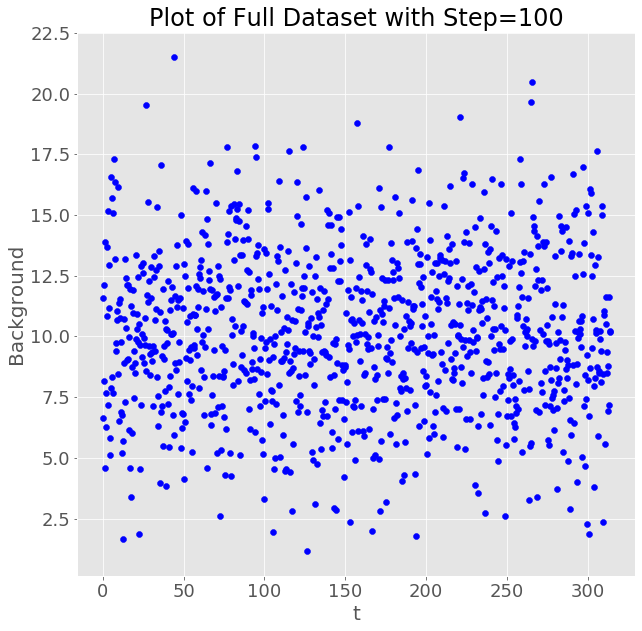

In [7]:
scatter_plotter(t,bkgd,0,None,100)

If we want to plot the whole dataset, but only every 100th point, we can input the step to be 100. This just samples the dataset at even intervals.

# Density Plots

A 2D histogram plot using pyplot's plt.hist2d() can be used to plot the density of points. Following matplotlib's documentation, hist2d() takes in the following parameters:

x, y as input arrays; bins, which groups data into classes of equal width, as an integer (or array of integers if different bin sizes for x and y); density to normalize the histogram and returning a probability density (if set True), and some other optional parameters.

https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.hist2d.html

In [8]:
# make a 2D histogram plot with density

In [23]:
def hist2D_plotter(t,bg,bins):
    # plots a 2D histogram to show density of points in central area, user inputs number of bins

    fig, ax = plt.subplots(1, 1, figsize=(10,10))
    ax.set_title("2D Histogram Showing Central Density of Data", fontsize=24)
    ax.set_xlabel("t", fontsize=20)
    ax.set_ylabel("Background", fontsize=20)
    plt.tick_params(labelsize = 18)

    plt.hist2d(t,bg,density=True,bins=bins)
    plt.colorbar()
    plt.show()

This is a quick function written to plot the density of datapoints of the background using a 2D histogram. The input parameters are the t and background datasets, and an integer number of bins which can be easily varied to achieve an optimal output graph.

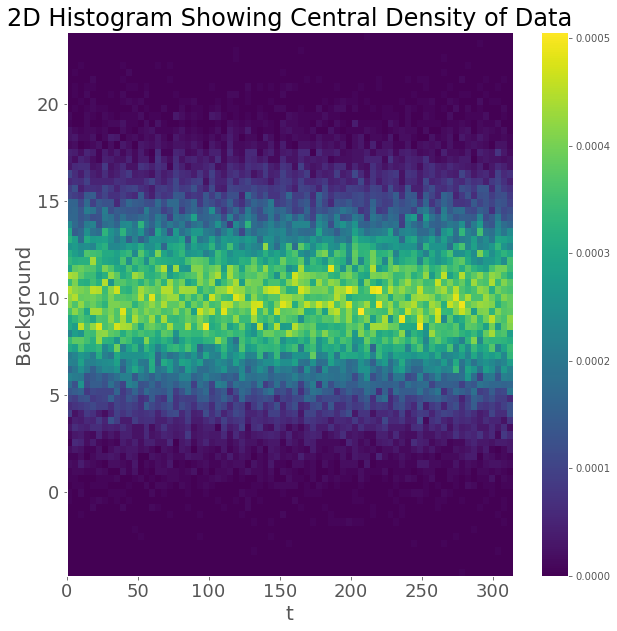

In [24]:
hist2D_plotter(t,bkgd,75)

The resultant plot above is a 2D histogram showing the central density of the points for *t* and the random background (which has a dependency on a sinusoidal function N that also depends on *t*). The dark purple color at the bottom of the colorbar indicates no density; this means there are little to no points from either dataset at this area on the plot. Going up the colorbar means increasing density of data points; the mid-range teal color indicates a relatively dense location, whereas bright green and yellow displays the locations with the most dense points plotted in the figure.

This is useful in that a scatterplot showing 100,000 data points at this size would not be meaningful or show us specific areas where many data points are without "zooming in" (which we did in the previous plots). Without the density feature and colorbar, it is very hard to distinguish anything notable from a scatterplot of such a size. For example, using the scatter_plotter function, without slicing any of the array (plotting the entire 100,000 points) looks like the following graph:

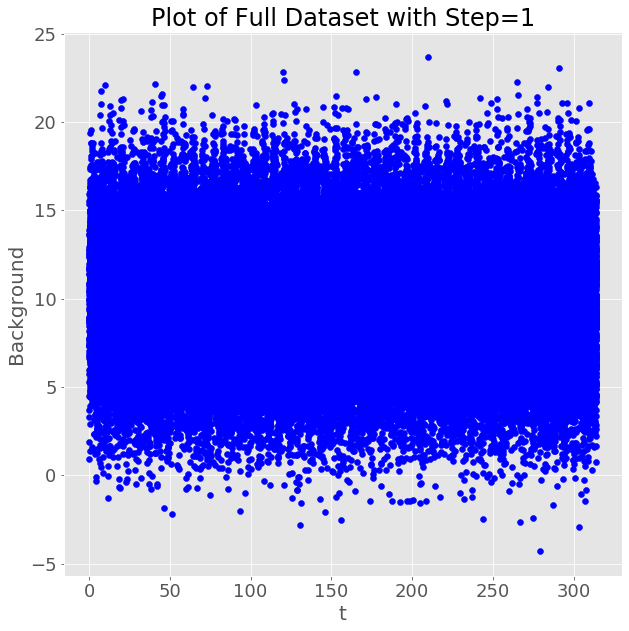

In [25]:
scatter_plotter(t,bkgd,None,None,1)

Without blowing up the scale, the entire plot appears to be "dense". However, comparing to our 2D histogram, we know this is not the case. Therefore, the 2D density histogram can reveal specific areas in the dataset/background that are of key interest, or show us the general shape without overwhelming the figure with scatterplotted data points.

# Folding Data

The following function is intended to fold a periodic signal dataset using the modulo operator in order to demonstrate the pattern and shape of the data more clearly when plotted as a 2D histogram or scatterplot.

In [26]:
def fold_signal(t):
    # folds the periodic signal at a period of 2pi
    tfolded = t % (2*np.pi)
    return tfolded

In [27]:
folded = fold_signal(t)

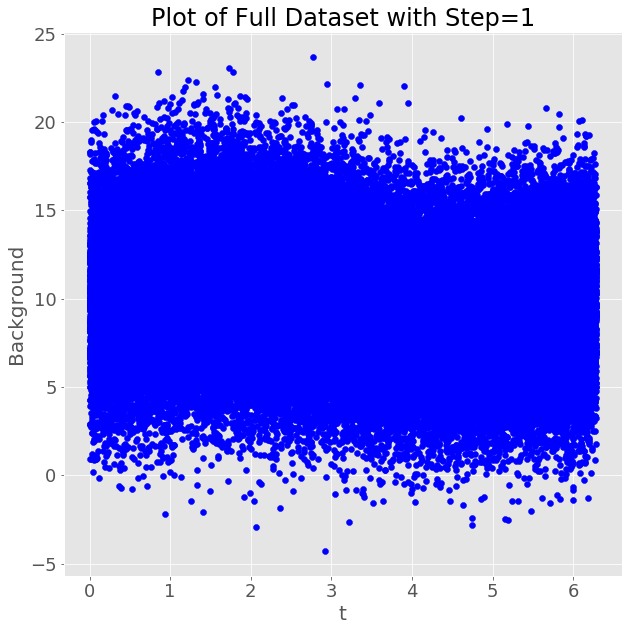

In [28]:
# scatterplot full dataset, but with folded data
scatter_plotter(folded,bkgd,None,None,1)

Using the scatter_plotter function we originally wrote, we plot the background and now-folded signal data, which was quickly calculated using the modulo operator with a period of $2\pi$. Since the dataset is periodic, it makes sense for the folded dataset to take on a sinusoidal shape. This shape is much clearer in the new scatterplot, and will also be clearly demonstrated in the 2D histogram.

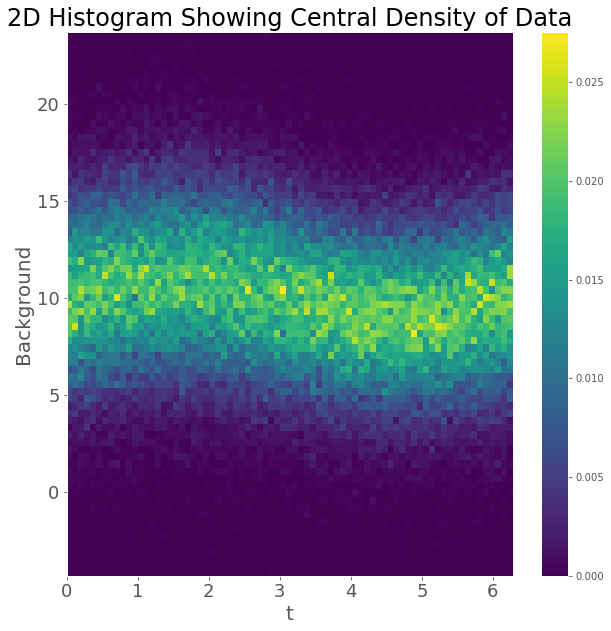

In [29]:
hist2D_plotter(folded,bkgd,75)

We can now see the sinusoidal shape of the data much more clearly.

Finally, we can calculate the average as a function of the t axis by calculating binned statistics. This allows us to calculate the average value within a range (a bin). Then, we plot this using the edges that scipy.stats.binned_statistic returns. Overplotting this on the histogram shows us the average curve, which appears sinusoidal.

In [30]:
def avg(foldedt,bg,bins):
    mu,edges,binNo = stats.binned_statistic(foldedt,bg,statistic='mean',bins=bins)
    return edges, mu

In [31]:
newt, mu = avg(folded,bkgd,25)

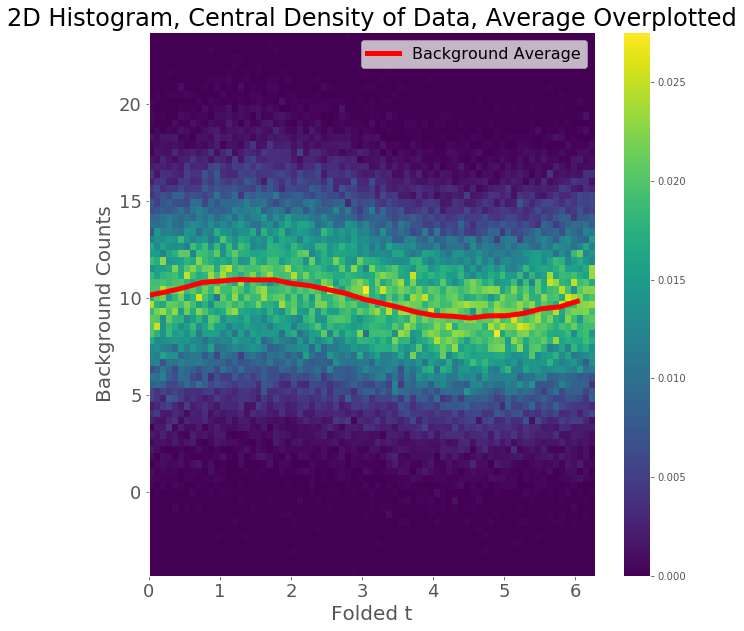

In [32]:
# overplot onto histogram
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.set_title("2D Histogram, Central Density of Data, Average Overplotted", fontsize=24)
ax.set_xlabel("Folded t", fontsize=20)
ax.set_ylabel("Background Counts", fontsize=20)
plt.tick_params(labelsize = 18)

plt.hist2d(folded,bkgd,density=True,bins=75)
ax.plot(newt[:-1],mu,color='r',linewidth=5,label='Background Average')
plt.colorbar()
plt.legend(fontsize=16)
plt.show()

With the average density overplotted on the 2D histogram, we can now see clearly see the average background counts as a function of folded/periodic time.